## Beta Computation

In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import yfinance as yf
import math as mt
import statistics as st
from datetime import datetime

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker 
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

In [8]:
ftse = stock("^FTSE", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [13]:
ftse.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,7077.051891,7121.544792,7030.847494,7076.738243,7076.738243,8.087508e+08
std,555.237247,543.666171,566.763226,555.093370,555.093370,2.992049e+08
min,4993.899902,5181.000000,4898.799805,4993.899902,4993.899902,0.000000e+00
25%,6885.299805,6938.299805,6836.100098,6885.299805,6885.299805,6.319410e+08
50%,7211.600098,7250.100098,7170.299805,7211.600098,7211.600098,7.452301e+08
75%,7469.299805,7505.600098,7428.100098,7467.399902,7467.399902,9.032731e+08
max,8014.299805,8047.100098,7995.500000,8014.299805,8014.299805,2.585566e+09


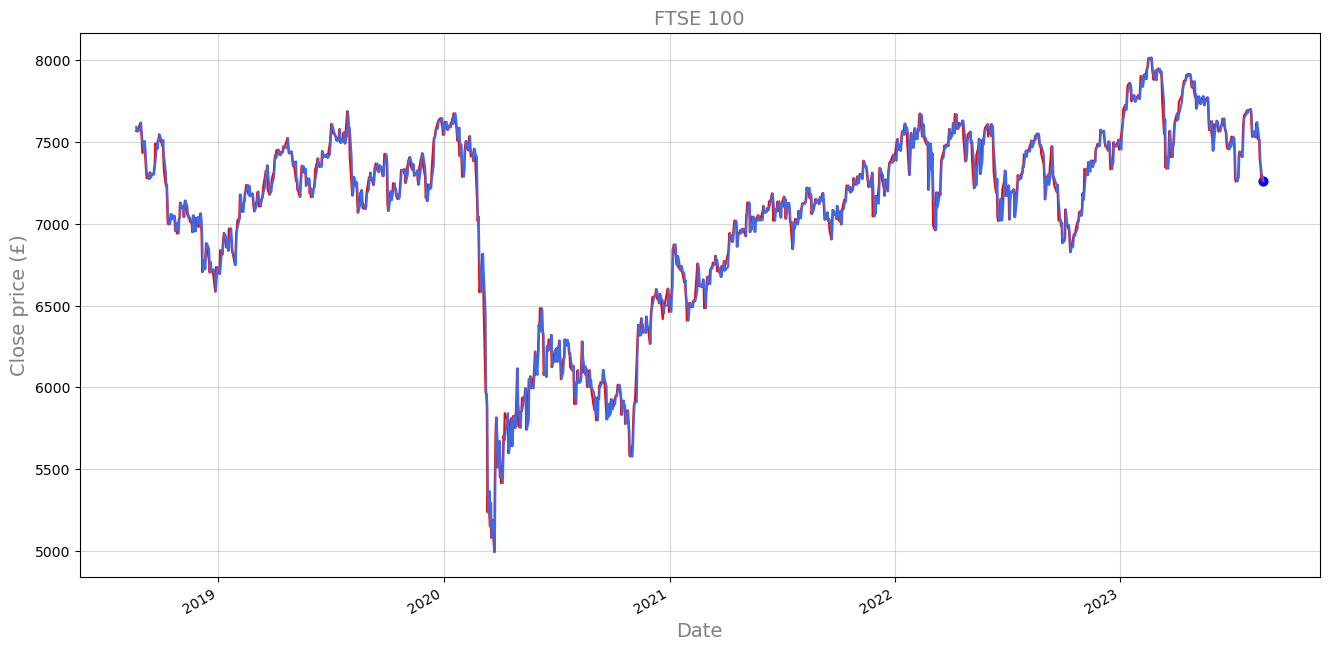

In [16]:
plt.figure(figsize=(16,8))
ftse.Close.plot(color="red")
ftse.Open.plot(color="royalblue")
plt.scatter(ftse.index[-1], ftse.Close[-1], s=40, color="blue")
plt.grid(True, alpha=0.5)
plt.title("FTSE 100", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [22]:
burberry = stock("BRBY.L", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [23]:
burberry['Close'] = burberry['Close']/100
burberry['Open'] = burberry['Open']/100

In [24]:
c.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-15,22.29,2249.0,2190.0,22.07,2207.0,850624
2023-08-16,22.00,2222.0,2193.0,22.06,2206.0,2258483
2023-08-17,21.85,2220.0,2171.0,21.85,2185.0,766394
2023-08-18,21.72,2172.0,2125.0,21.49,2149.0,1173735
2023-08-21,21.42,2182.0,2141.0,21.53,2153.0,853408


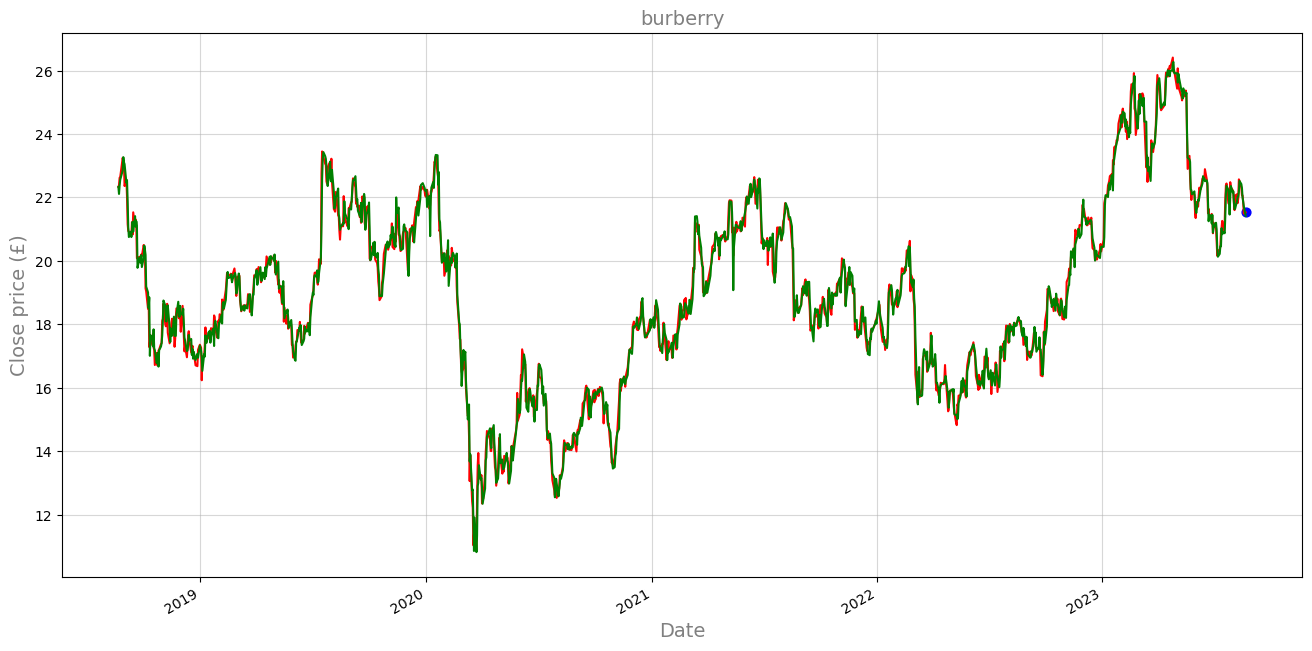

In [26]:
plt.figure(figsize=(16,8))
burberry.Close.plot(color="red")
plt.scatter(burberry.index[-1], burberry.Close[-1], s=40, color="blue")
burberry.Open.plot(color="green")
plt.grid(True, alpha=0.5)
plt.title("burberry", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [27]:
burberry.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,18.979830,1923.853802,1871.735190,18.978114,1782.227611,1.586200e+06
std,2.855966,284.166885,285.874705,2.859136,291.874100,8.974046e+05
min,10.815000,1130.500000,1017.000000,10.850000,1004.167114,3.977900e+04
25%,17.180000,1742.625000,1692.625000,17.186250,1592.098724,9.909880e+05
50%,18.802500,1905.000000,1854.750000,18.772500,1761.370239,1.315390e+06
75%,21.000000,2120.750000,2076.500000,20.987500,1957.560577,1.939618e+06
max,26.270000,2656.000000,2617.000000,26.410000,2586.030762,6.396838e+06


In [31]:
data = {"FTSE": ftse.Close,
       "BRBY": burberry.Close}
data = pd.DataFrame(data)
data.tail()

,FTSE,BRBY
Date,,
2023-08-15,7389.600098,22.07
2023-08-16,7356.899902,22.06
2023-08-17,7310.200195,21.85
2023-08-18,7262.399902,21.49
2023-08-21,7257.819824,21.53


In [37]:
returns = np.log(data/data.shift(1))
returns.dropna(inplace=True)
returns.tail()

,FTSE,BRBY
Date,,
2023-08-15,-0.015789,-0.010816
2023-08-16,-0.004435,-0.000453
2023-08-17,-0.006368,-0.009565
2023-08-18,-0.006560,-0.016613
2023-08-21,-0.000631,0.001860


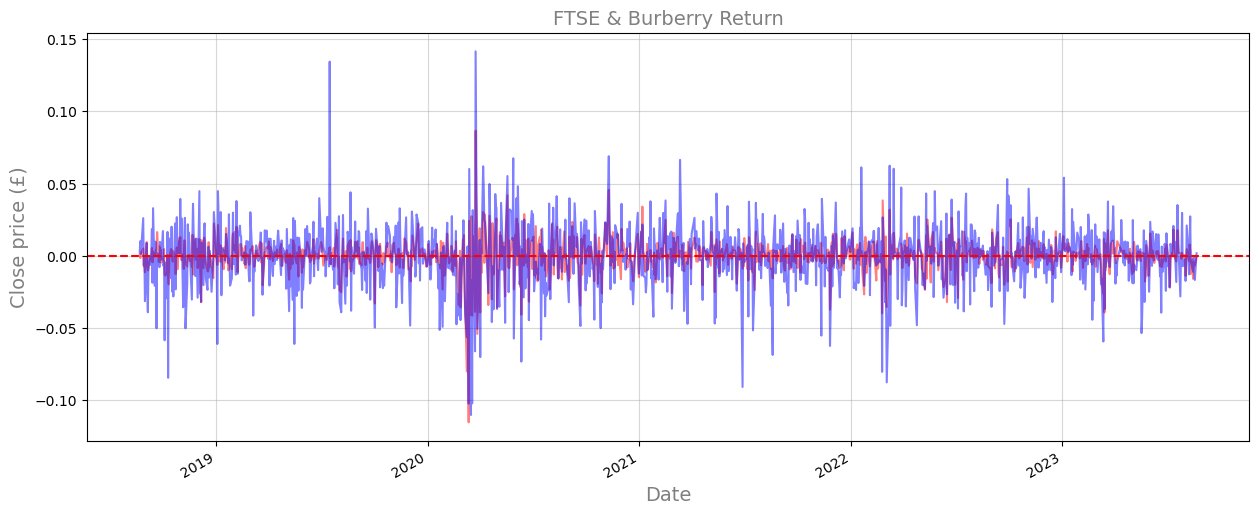

In [38]:
plt.figure(figsize=(15,6))
returns.FTSE.plot(color="red", alpha=0.5)
returns.BRBY.plot(color="blue", alpha=0.5)
plt.grid(True, alpha=0.5)
plt.title("FTSE & Burberry Return", fontsize=14, color="grey")
plt.axhline(0, color="red", linestyle="--")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [39]:
ftse_var = returns.FTSE.var()
ftse_var

0.00012769995603854322

In [40]:
returns_cov = returns.cov()
returns_cov

,FTSE,BRBY
FTSE,0.000128,0.000161
BRBY,0.000161,0.000483


In [42]:
#FTSE100 and AZN covariance 
st.covariance(returns.FTSE, returns.BRBY)

0.0001611783094672207

In [44]:
beta = st.covariance(returns.FTSE, returns.BRBY)/st.variance(returns.FTSE)

In [46]:
X = returns['FTSE'].values.reshape(-1, 1)
y = returns['BRBY'].values

In [47]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
print(f"Beta of Burberry : {model.coef_[0]}")

Beta of Burberry : 1.262164173483134


In [49]:
model.intercept_

2.614532751731843e-05

In [51]:
y_pred = model.predict(X)
y_pred[:10]

array([ 0.00144338, -0.00180823,  0.00241028,  0.00662164, -0.00895348,
       -0.00787541, -0.01409151,  0.01222795, -0.00785269, -0.01266264])

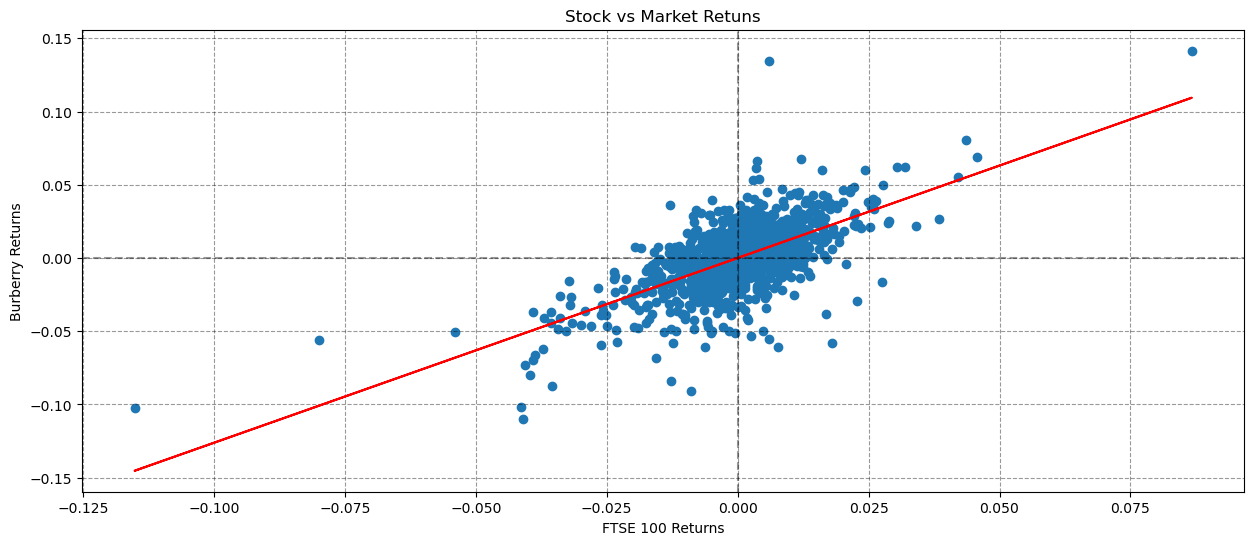

In [53]:
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.plot(X, y_pred, color="red")
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")
plt.show()

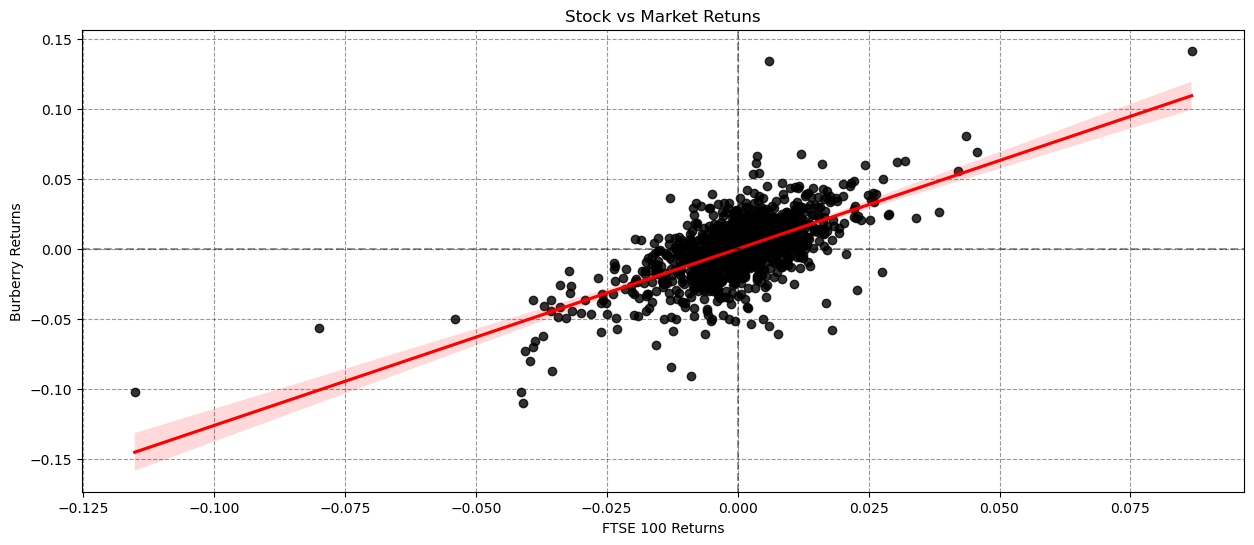

In [54]:
plt.figure(figsize=(15,6))
sns.regplot(x = "FTSE", y = "BRBY", data = returns, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")

## Smart Beta

In [60]:
stock_ticker = ['III.L','ABDN.L','ADM.L','AAF.L','AAL.L','ANTO.L','AHT.L','ABF.L','AZN.L','AUTO.L',
 'AV.L','BME.L','BA.L','BARC.L','BDEV.L','BEZ.L','BKG.L','BP.L','BATS.L','BT.A.L',
 'BNZL.L','BRBY.L','CNA.L','CCH.L','CPG.L','CTEC.L','CRH.L','CRDA.L','DCC.L','DGE.L',
 'EDV.L','ENT.L','EXPN.L','FCIT.L','FLTR.L','FRAS.L','FRES.L','GLEN.L','GSK.L','HLN.L',
 'HLMA.L','HL.L','HSX.L','HSBA.L','IMI.L','IMB.L','INF.L','IHG.L','IAG.L','ITRK.L',
 'JD.L','JMAT.L','KGF.L','LAND.L','LGEN.L','LLOY.L','LSEG.L','MNG.L','MRO.L',
 'MNDI.L','NG.L','NWG.L','NXT.L','OCDO.L','PSON.L','PSH.L','PSN.L','PHNX.L','PRU.L',
 'RKT.L','REL.L','RTO.L','RMV.L','RIO.L','RR.L','RS1.L','SGE.L','SBRY.L','SDR.L',
 'SMT.L','SGRO.L','SVT.L','SHEL.L','SN.L','SMDS.L','SMIN.L','SKG.L','SPX.L','SSE.L',
 'STJ.L','STAN.L','TW.L','TSCO.L','ULVR.L','UTG.L','UU.L','VOD.L','WEIR.L','WTB.L','WPP.L']

In [80]:
uk_chart = stock(stock_ticker, "1Y").chart()

[*********************100%***********************]  100 of 100 completed


1 Failed download:
['BT.A.L']: Exception('%ticker%: No data found, symbol may be delisted')


In [81]:
close = uk_chart['Adj Close']/100
volume = uk_chart['Volume']

In [82]:
uk_chart.head()

Adj Close                                        \
                          AAF.L        AAL.L      ABDN.L        ABF.L   
Date                                                                    
2022-08-22 00:00:00  134.732178  2712.316895  140.157745  1536.499634   
2022-08-23 00:00:00  131.008179  2797.373779  140.250198  1520.428345   
2022-08-24 00:00:00  130.626236  2736.075928  138.817184  1514.584473   
2022-08-25 00:00:00  130.244263  2774.565430  138.077576  1508.253296   
2022-08-26 00:00:00  129.384888  2777.416260  135.951157  1476.111084   

                                                                        \
                           ADM.L        AHT.L       ANTO.L      AUTO.L   
Date                                                                     
2022-08-22 00:00:00  2188.053467  4353.122559  1088.920166  657.382935   
2022-08-23 00:00:00  2147.516113  4254.835449  1124.733521  646.426575   
2022-08-24 00:00:00  2165.854492  4277.441406  1110.214600  657.178955   
2022-08-25 00:00:00  2140.760010  4284.321777  1129.573242  659.665649   
2022-08-26 00:00:00  2115.665283  4224.366699  1136.348633  647.132751   

                                               ...   Volume            \
                           AV.L         AZN.L  ...    SVT.L    TSCO.L   
Date                                           ...                      
2022-08-22 00:00:00  409.953064  11205.631836  ...  1417672  10877448   
2022-08-23 00:00:00  407.671326  10968.590820  ...   712885  10100010   
2022-08-24 00:00:00  404.248718  11117.476562  ...   338657  23955949   
2022-08-25 00:00:00  404.058563  11188.001953  ...   345550  18750292   
2022-08-26 00:00:00  399.780304  11131.189453  ...   380300  13199502   

                                                                               \
                         TW.L   ULVR.L    UTG.L     UU.L       VOD.L   WEIR.L   
Date                                                                            
2022-08-22 00:00:00  17654833  2123369   562019  1316051  70357583.0   434947   
2022-08-23 00:00:00  12170251  2968462   973112  1435180  63387191.0  2910120   
2022-08-24 00:00:00  11935815  3127716  1001243   991518  49653623.0   626716   
2022-08-25 00:00:00   9996369  4031051   365961  1060465  48811259.0   495686   
2022-08-26 00:00:00  18419501  2678656   504431   989725  60936672.0   340099   

                                       
                       WPP.L    WTB.L  
Date                                   
2022-08-22 00:00:00  3118994   680795  
2022-08-23 00:00:00  2648808   322536  
2022-08-24 00:00:00  2903099   608750  
2022-08-25 00:00:00  2207630   706680  
2022-08-26 00:00:00  3925444  1055653  

[5 rows x 600 columns]

In [83]:
volume.head()

,AAF.L,AAL.L,ABDN.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-22 00:00:00,2302391,2173115,9099360,734929,568269,630340,1245023,2239276,7869126,1709107,...,1417672,10877448,17654833,2123369,562019,1316051,70357583.0,434947,3118994,680795
2022-08-23 00:00:00,2515406,1993701,16436690,787289,625615,702207,1996875,2956567,6226255,1505012,...,712885,10100010,12170251,2968462,973112,1435180,63387191.0,2910120,2648808,322536
2022-08-24 00:00:00,3182575,1674163,6466492,565737,550473,924744,1237289,3327235,5878312,1462807,...,338657,23955949,11935815,3127716,1001243,991518,49653623.0,626716,2903099,608750
2022-08-25 00:00:00,2053088,1501338,4587324,966351,511756,748767,1451935,851060,3026160,1240502,...,345550,18750292,9996369,4031051,365961,1060465,48811259.0,495686,2207630,706680
2022-08-26 00:00:00,3791154,10826834,6483659,687556,518365,1104962,1212396,1475805,13492719,1998604,...,380300,13199502,18419501,2678656,504431,989725,60936672.0,340099,3925444,1055653


In [104]:
tickers = yf.Tickers(stock_ticker)
tickers_hist = tickers.history(interval='1d', period='4y')
tickers_hist

[*********************100%***********************]  100 of 100 completed


1 Failed download:
['BT.A.L']: Exception('%ticker%: No data found, symbol may be delisted')


Adj Close       Close                                        \
              BT.A.L       AAF.L        AAL.L      ABDN.L        ABF.L   
Date                                                                     
2019-08-21       NaN   54.815632  1445.645874  175.924469  2147.928223   
2019-08-22       NaN   55.099861  1410.071289  178.858994  2134.721680   
2019-08-23       NaN   55.181061  1398.324707  176.584732  2148.871338   
2019-08-27       NaN   54.165966  1418.293579  183.921036  2138.494873   
2019-08-28       NaN   55.018654  1441.115112  180.766418  2131.891846   
...              ...         ...          ...         ...          ...   
2023-08-15       NaN  117.000000  1970.040771  169.955215  1967.500000   
2023-08-16       NaN  115.300003  1971.500000  166.649994  1991.000000   
2023-08-17       NaN  113.699997  2008.500000  165.899994  1966.000000   
2023-08-18       NaN  108.699997  1972.400024  161.899994  1960.000000   
2023-08-21       NaN  107.599998  1970.000000  160.500000  1955.000000   

                                                                           \
                  ADM.L        AHT.L       ANTO.L      AUTO.L        AV.L   
Date                                                                        
2019-08-21  1890.135132  2062.804443   707.193176  509.195343  289.509705   
2019-08-22  1877.100098  2059.015625   705.121216  500.030914  292.739899   
2019-08-23  1874.492798  2033.443481   700.977539  501.176483  291.851654   
2019-08-27  1881.444824  2039.126221   699.596375  510.913696  289.509705   
2019-08-28  1845.815186  2020.183960   709.092407  502.131165  285.471893   
...                 ...          ...          ...         ...         ...   
2023-08-15  2199.000000  5526.000000  1452.500000  616.599976  379.899994   
2023-08-16  2358.000000  5540.000000  1420.000000  612.400024  383.200012   
2023-08-17  2375.000000  5436.000000  1422.500000  602.200012  381.100006   
2023-08-18  2361.000000  5328.000000  1375.500000  598.000000  382.799988   
2023-08-21  2362.000000  5344.000000  1390.000000  590.599976  378.000000   

            ...  Volume                                                    \
            ...   SVT.L      TSCO.L        TW.L   ULVR.L   UTG.L     UU.L   
Date        ...                                                             
2019-08-21  ...  535784  13573432.0   9856064.0  2026711  548493  1214519   
2019-08-22  ...  986266  20720635.0   9134896.0  2177486  572905  1752241   
2019-08-23  ...  494520  14316821.0   9168689.0  1225942  613663  1657239   
2019-08-27  ...  743161  29184392.0  24008655.0  3091257  932517  2301249   
2019-08-28  ...  558496  21271149.0  15937650.0  2227227  702216  1557878   
...         ...     ...         ...         ...      ...     ...      ...   
2023-08-15  ...  363980  10226197.0   8884139.0  2003031  618305  2566368   
2023-08-16  ...  391191  23738896.0  11850508.0  3808109  580820  1099400   
2023-08-17  ...  509068   8889920.0   7533626.0  2669827  609394  1074461   
2023-08-18  ...  359282  19285302.0   7334617.0  4704126  593922  1294313   
2023-08-21  ...  267271  13315414.0   9088522.0  2191868  455103  1152385   

                                                         
                 VOD.L     WEIR.L      WPP.L      WTB.L  
Date                                                     
2019-08-21  35834252.0   879698.0  2491996.0  1071008.0  
2019-08-22  55860706.0   874578.0  2148482.0   457539.0  
2019-08-23  42098369.0  1892247.0  2372012.0   767273.0  
2019-08-27  78003022.0  1882717.0  3264424.0  1228487.0  
2019-08-28  52322992.0  1408016.0  2300430.0   675363.0  
...                ...        ...        ...        ...  
2023-08-15  34353257.0   818269.0  2380201.0   663644.0  
2023-08-16  71544787.0   738691.0  3427066.0   341839.0  
2023-08-17  33523874.0   571197.0  2747727.0   549261.0  
2023-08-18  46217281.0   425640.0  3080069.0   768648.0  
2023-08-21  29006706.0   330642.0  1198332.0   711417.0  

[10

In [105]:
close = tickers_hist['Close']/100
volume = tickers_hist['Volume']
dividends = tickers_hist['Dividends']

In [106]:
dividends

,AAF.L,AAL.L,ABDN.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-17,0.0,55.0,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
